# Supervised Learning - Project

In this Project, we are going to perform a full supervised learning machine learning project on a "Diabetes" dataset. This dataset is originally from the National Institute of Diabetes and Digestive and Kidney
Diseases. The objective of the dataset is to diagnostically predict whether a patient has diabetes,
based on certain diagnostic measurements included in the dataset. 

[Kaggle Dataset](https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset)

# Part I : EDA - Exploratory Data Analysis

For this task, you are required to conduct an exploratory data analysis on the diabetes dataset. You have the freedom to choose the visualizations you want to use, but your analysis should cover the following tasks mostly:

- Are there any missing values in the dataset?
- How are the predictor variables related to the outcome variable?
- What is the correlation between the predictor variables?
- What is the distribution of each predictor variable?
- Are there any outliers in the predictor variables?
- How are the predictor variables related to each other?
- Is there any interaction effect between the predictor variables?
- What is the average age of the individuals in the dataset?
- What is the average glucose level for individuals with diabetes and without diabetes?
- What is the average BMI for individuals with diabetes and without diabetes?
- How does the distribution of the predictor variables differ for individuals with diabetes and without diabetes?
- Are there any differences in the predictor variables between males and females (if gender information is available)?

In [232]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import spearmanr
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, roc_auc_score, recall_score, precision_score, average_precision_score, f1_score, classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles

from sklearn.tree import export_graphviz
import graphviz
import pickle
import altair


In [89]:
df = pd.read_csv('diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [13]:
#Are there any missing values in the dataset? 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### No Missing Values (all columns have no null values and 768 entries)

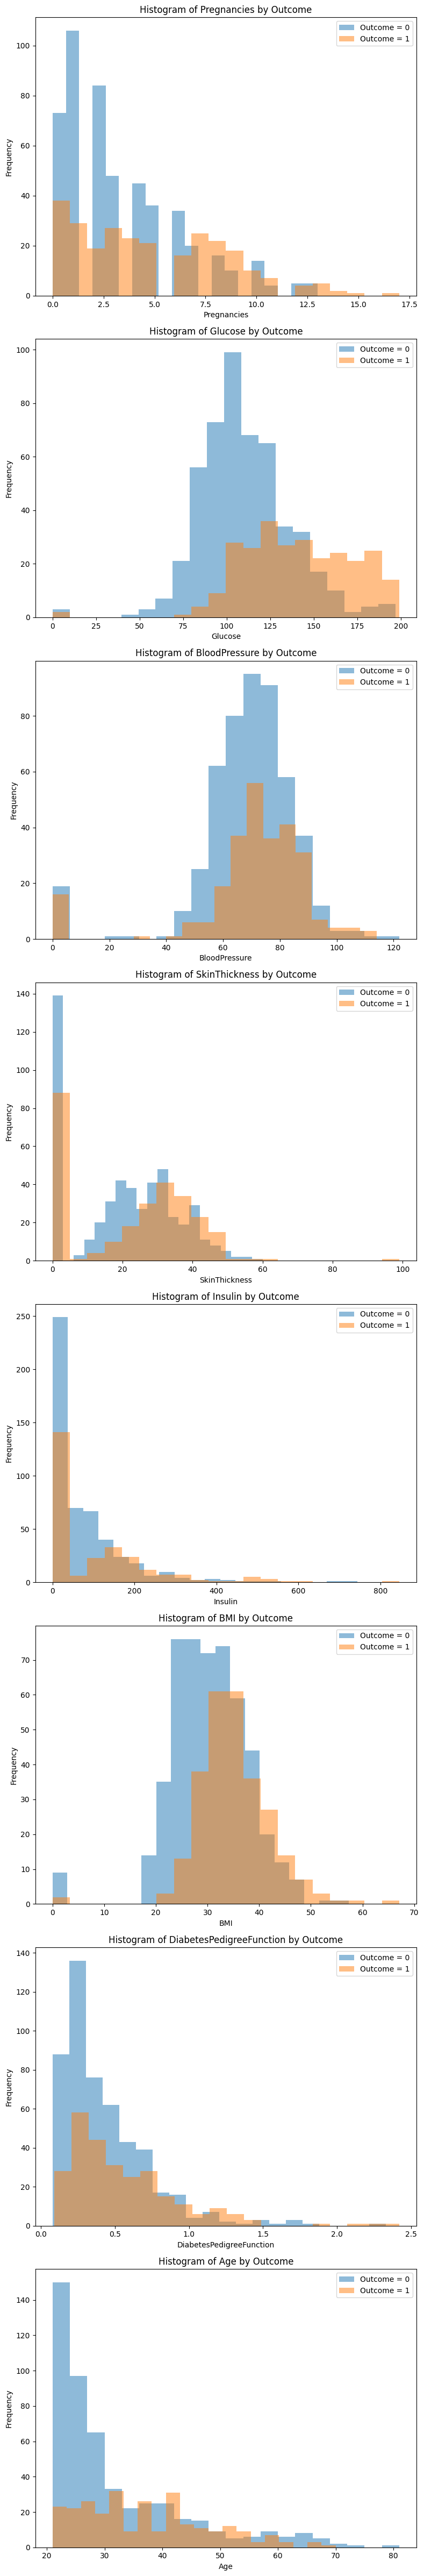

In [177]:
# How are the predictor variables related to the outcome variable?
x_vars=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age'] 
y_vars='Outcome'

fig, axes = plt.subplots(nrows=len(x_vars), ncols=1, figsize=(8, 6 * len(x_vars)))
for i, var in enumerate(x_vars):
    # Creating histograms for each x variable split by y_var
    for outcome_val in sorted(df[y_vars].unique()):
        subset = df[df[y_vars] == outcome_val][var]
        axes[i].hist(subset, bins=20, alpha=0.5, label=f'{y_vars} = {outcome_val}')
        axes[i].set_title(f'Histogram of {var} by {y_vars}')
        axes[i].set_xlabel(var)
        axes[i].set_ylabel('Frequency')
        axes[i].legend()

plt.tight_layout()
plt.show()

### Each individual predictor variable has similar relationship between it's chance of resulting in diabetes (1) or not resulting in diabetes (0)

In [23]:
#What is the correlation between the predictor variables?
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<Axes: >

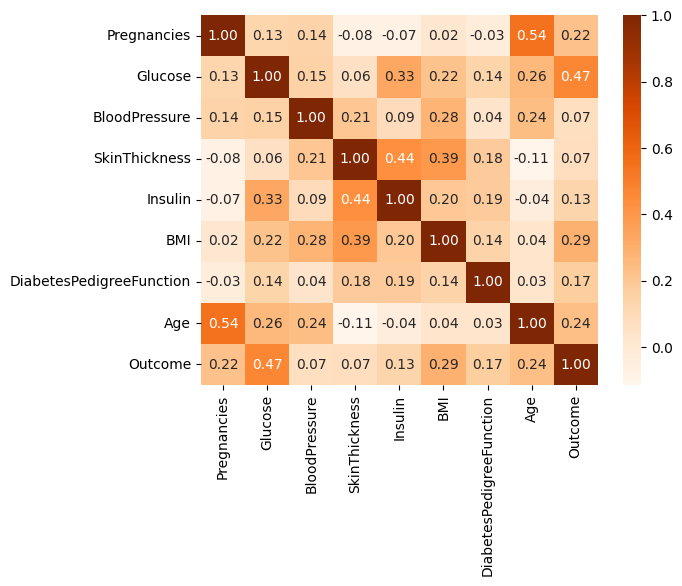

In [25]:
sns.heatmap(df.corr(), annot=True, cmap='Oranges', fmt=".2f")

### Amongst predictor variables, only age to pregnancies has a relevant correlation. However amonsts predictor variables to outcome, Glucose has the highest correlation.

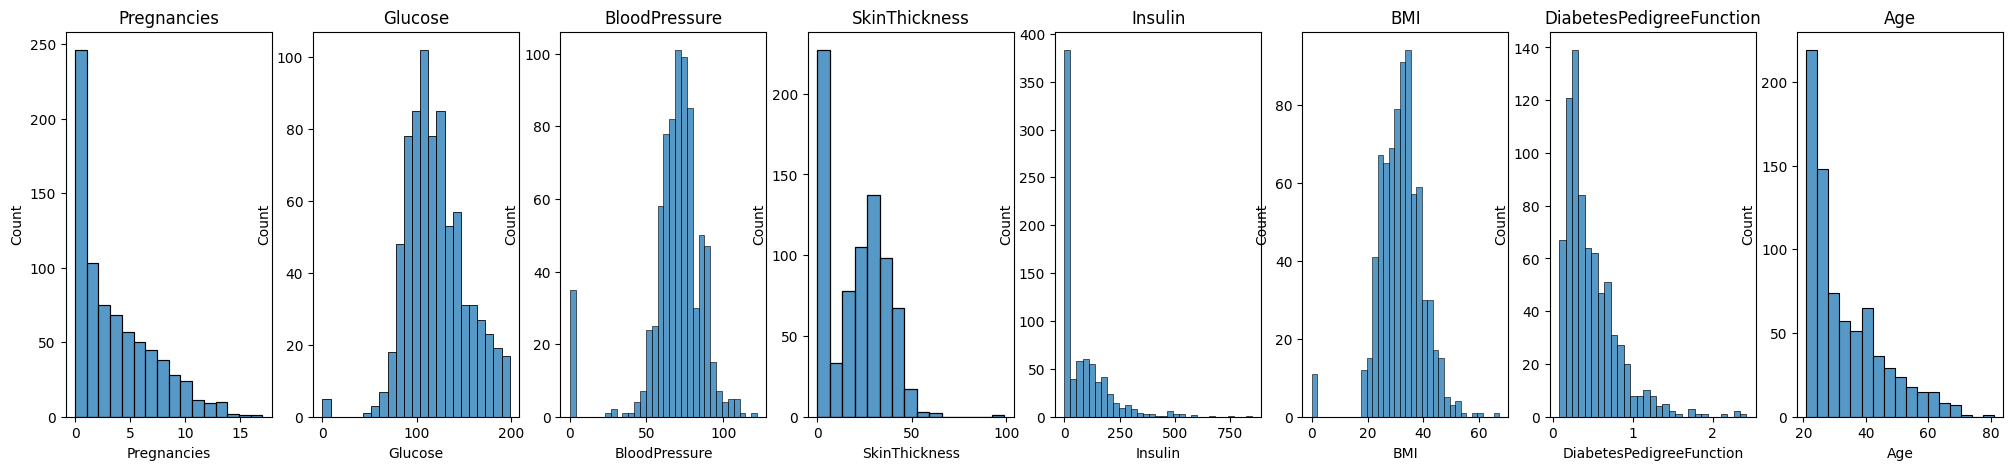

In [44]:
# - What is the distribution of each predictor variable?
selected_columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']
fig, axes = plt.subplots(nrows=1, ncols=len(selected_columns), figsize=(25, 5))

# Plotting histograms for selected columns
for i, column in enumerate(selected_columns):
    sns.histplot(df[column], ax=axes[i])
    axes[i].set_title(column)



### Pregnancies: Left skewed, Glucose: Normal, Blood Pressure: Normal, SkinThickness: Left Skewed, Insulin: Left Skewed, BMI: Normal, DiabetesePedigreeeFunction: Left Skewed, Age: Left Skewed

In [90]:
selected_columns
for column in selected_columns:
    new_column_name = f'Z_{column}'
    df[new_column_name] = np.abs((df[column] - df[column].mean()) / df[column].std())

In [99]:
#With Z scores
## Outliers (at least one of the columns has a z score greater than the absolute value of 3)
Outliers = df[(df['Z_Pregnancies']>3) | (df['Z_Glucose']>3) | (df['Z_BloodPressure']>3) | (df['Z_SkinThickness']>3) | (df['Z_Insulin']>3) | (df['Z_BMI']>3) | (df['Z_DiabetesPedigreeFunction']>3) | (df['Z_Age']>3)]
Outliers

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Z_Pregnancies,Z_Glucose,Z_BloodPressure,Z_SkinThickness,Z_Insulin,Z_BMI,Z_DiabetesPedigreeFunction,Z_Age
4,0,137,40,35,168,43.1,2.288,33,1,1.141108,0.503727,1.503707,0.906679,0.765337,1.408828,5.481337,0.020483
7,10,115,0,0,0,35.3,0.134,29,0,1.826623,0.184362,3.570271,1.287373,0.692439,0.419502,1.019762,0.360612
8,2,197,70,45,543,30.5,0.158,53,1,0.547562,2.380333,0.046215,1.533551,4.019303,0.189314,0.947326,1.680164
9,8,125,96,0,0,0.0,0.232,54,1,1.233077,0.128406,1.389481,1.287373,0.692439,4.057829,0.723983,1.765196
13,1,189,60,23,846,30.1,0.398,59,1,0.844335,2.130119,0.470426,0.154433,6.648507,0.240048,0.222970,2.190358
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,7,142,90,24,480,30.4,0.128,43,1,0.936304,0.660111,1.079497,0.217120,3.472636,0.201997,1.037871,0.829840
697,0,99,0,0,0,25.0,0.253,22,0,1.141108,0.684790,3.570271,1.287373,0.692439,0.886915,0.660602,0.955839
703,2,129,0,0,0,38.5,0.304,41,0,0.547562,0.253513,3.570271,1.287373,0.692439,0.825379,0.506676,0.659776
706,10,115,0,0,0,0.0,0.261,30,1,1.826623,0.184362,3.570271,1.287373,0.692439,4.057829,0.636457,0.275580


In [101]:
#- How are the predictor variables related to each other?
## The predictor variables don't have much relation to each other as shown in the correlation heatmap above. Only pregnancy and age have a correlation with makes sense because you can only have more pregnancies as your age increases.
## There is also some correlation between skin thickness and BMI/Insulin  

In [102]:
#- Is there any interaction effect between the predictor variables?
## Due to the correlation of the BMI and Insulin to skin thickness, it could be possible that there is an interaction between the 3 variables which should be explored further

In [104]:
#- What is the average age of the individuals in the dataset?
df['Age'].mean()

33.240885416666664

In [109]:
#- What is the average glucose level for individuals with diabetes and without diabetes?
df[['Glucose','Outcome']].groupby('Outcome').mean()

,Glucose
Outcome,
0,109.980000
1,141.257463


In [110]:
#- What is the average BMI for individuals with diabetes and without diabetes?
df[['BMI','Outcome']].groupby('Outcome').mean()

,BMI
Outcome,
0,30.304200
1,35.142537


In [114]:
#- How does the distribution of the predictor variables differ for individuals with diabetes and without diabetes?
PositiveDiabetes = df[df['Outcome']==1]

In [115]:
NegativeDiabetes = df[df['Outcome']==0]

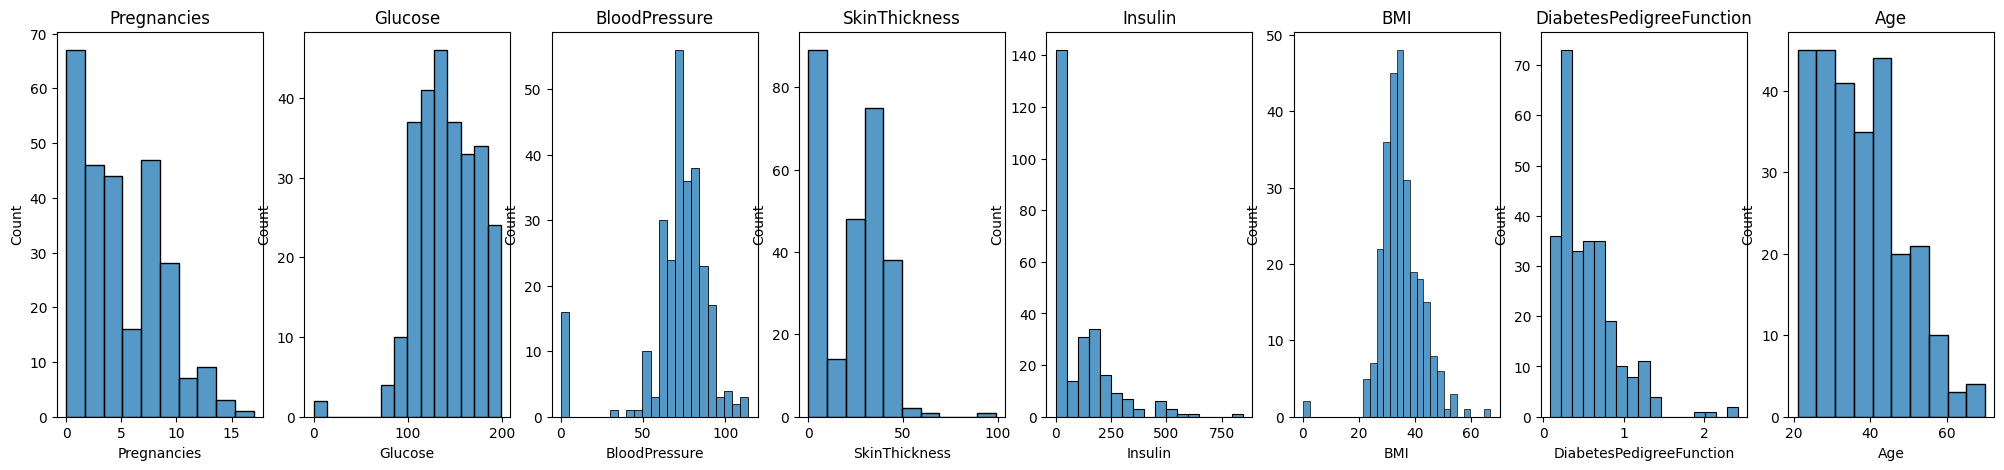

In [119]:
##Positive Diabetes Distibrutions
fig, axes = plt.subplots(nrows=1, ncols=len(selected_columns), figsize=(25, 5))

# Plotting histograms for selected columns
for i, column in enumerate(selected_columns):
    sns.histplot(PositiveDiabetes[column], ax=axes[i])
    axes[i].set_title(column)

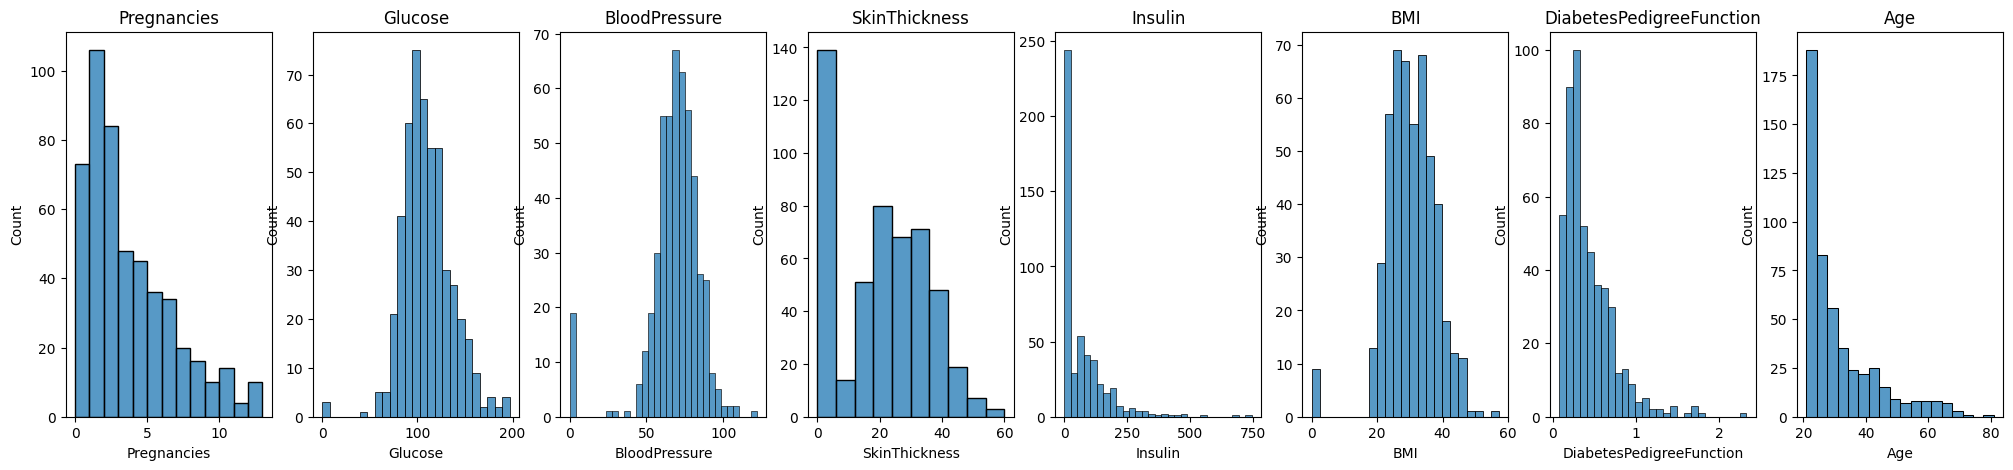

In [120]:
## Negative Diabetes Distributions 
fig, axes = plt.subplots(nrows=1, ncols=len(selected_columns), figsize=(25, 5))

# Plotting histograms for selected columns
for i, column in enumerate(selected_columns):
    sns.histplot(NegativeDiabetes[column], ax=axes[i])
    axes[i].set_title(column)

### The main differences is that the glucose level for positive diabetes is right skewed compared to the normal distribution of negative diabetes meaning that higher glucose levels is a factor in positive readings. Another difference is in the Age where theres a larger spread in positive than negative (left skewed) meaning people who are older have a higher chance of getting a positive diagnosis.  

In [122]:
#- Are there any differences in the predictor variables between males and females (if gender information is available)? 
#N/A

# Part II : Preprocessing & Feature Engineering

You need to perform preprocessing on the given dataset. Please consider the following tasks and carry out the necessary steps accordingly.
- Handling missing values
- Handling outliers
- Scaling and normalization
- Feature Engineering
- Handling imbalanced data

In [214]:
#Feature Engineering Steps: 
#No Missing Values
#Remove Outliers
#Feature Selection based on statistical significance (spearmans rank)
#Feature Transformation using Log on leftskewed data


In [157]:
# Removing Outliers
df_clean = df.copy()


In [156]:
selected_Z_columns = ['Z_Pregnancies','Z_Glucose','Z_BloodPressure','Z_SkinThickness','Z_Insulin','Z_BMI','Z_DiabetesPedigreeFunction','Z_Age']

In [160]:
#Iterate through Z score columns and remove rows if greater than 3
for zcolumn in selected_Z_columns:
    df_clean = df_clean.drop(df_clean[df_clean[zcolumn]>3].index)

In [161]:
df_clean[selected_Z_columns].max()

Z_Pregnancies                 2.716942
Z_Glucose                     2.442886
Z_BloodPressure               2.732747
Z_SkinThickness               2.473859
Z_Insulin                     2.908616
Z_BMI                         2.918183
Z_DiabetesPedigreeFunction    2.985325
Z_Age                         2.955649
dtype: float64

In [166]:
df_clean.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Z_Pregnancies,Z_Glucose,Z_BloodPressure,Z_SkinThickness,Z_Insulin,Z_BMI,Z_DiabetesPedigreeFunction,Z_Age
0,6,148,72,35,0,33.6,0.627,50,1,0.639530,0.847771,0.149543,0.906679,0.692439,0.203880,0.468187,1.425067
1,1,85,66,29,0,26.6,0.351,31,0,0.844335,1.122665,0.160441,0.530556,0.692439,0.683976,0.364823,0.190548
2,8,183,64,0,0,23.3,0.672,32,1,1.233077,1.942458,0.263769,1.287373,0.692439,1.102537,0.604004,0.105515
3,1,89,66,23,94,28.1,0.167,21,0,0.844335,0.997558,0.160441,0.154433,0.123221,0.493721,0.920163,1.040871
5,5,116,74,0,0,25.6,0.201,30,0,0.342757,0.153085,0.252871,1.287373,0.692439,0.810813,0.817546,0.275580


In [180]:
df_clean.drop(selected_Z_columns, axis=1, inplace=True)

In [181]:
df_clean

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [193]:
## Feature Selection: Calculating spearmans correlation coef and p values
correlation_results = {}
for column in df_clean.columns:
    rho, p_value = spearmanr(df_clean[column], df_clean['Outcome'])
    correlation_results[column] = {'Spearman_rho': rho, 'P-value': p_value}

In [191]:
correlation_results_df = pd.DataFrame(correlation_results)
correlation_results_df = correlation_results_df.transpose()
correlation_results_df

,Spearman_rho,P-value
Pregnancies,0.217769,7.878407e-09
Glucose,0.462634,8.716295e-38
BloodPressure,0.190788,4.616662e-07
SkinThickness,0.081827,3.187291e-02
Insulin,0.061661,1.061039e-01
BMI,0.289168,1.018605e-14
DiabetesPedigreeFunction,0.199042,1.408963e-07
Age,0.309369,1.002403e-16
Outcome,1.000000,0.000000e+00


### All p values are less than 0.05 so they are statistically significant and should remain for modelling. 

In [215]:
##Transformations (Excluding the features already with normal distribution)
## Although some of the data have left skewed distributions, chosen not to further transform the data because logarthmic functions will not work as many of the values are 0 result in errors and adding 1 will create duplicates for
## for low value features (pregnancies). Will choose to keep the data so that the correlations will remain.
## This should not impact the models because decision trees/forests can handle unscaled data.  


# Part III : Training ML Model

For this task, you are required to build a machine learning model to predict the outcome variable. This will be a binary classification task, as the target variable is binary. You should select at least two models, one of which should be an ensemble model, and compare their performance.

- Train the models: Train the selected models on the training set.
- Model evaluation: Evaluate the trained models on the testing set using appropriate evaluation metrics, such as accuracy, precision, recall, F1-score, and ROC-AUC.
- Model comparison: Compare the performance of the selected models and choose the best-performing model based on the evaluation metrics. You can also perform additional analysis, such as model tuning and cross-validation, to improve the model's performance.

# Decision Tree

In [330]:
# split data into training and testing sets
X = df_clean.drop(columns=['Outcome'])
X.columns = ['x1', 'x2','x3', 'x4', 'x5','x6','x7','x8']
y = df_clean[['Outcome']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=93)

In [347]:
# train a decision tree classifier
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=4, min_samples_leaf=10)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=10)

In [348]:
model.score(X_train, y_train)

0.7872727272727272

In [349]:
model.score(X_test, y_test)

0.8115942028985508

In [357]:
from sklearn import metrics
# Make predictions on the test set
y_pred = model.predict(X_test)

print(metrics.classification_report(y_test, y_pred, digits=3))


              precision    recall  f1-score   support

           0      0.854     0.872     0.863        94
           1      0.714     0.682     0.698        44

    accuracy                          0.812       138
   macro avg      0.784     0.777     0.780       138
weighted avg      0.810     0.812     0.810       138



In [ ]:
## The model predicted 81% correct on data it didn't see. This is an overall good performance, 
## however since it is higher than the training score, there could be a potential for overfit. 
## Since this model is predicting a disease, false negatives are more important to avoid misdiagnoses. 
## Therefore recall is the more important metric, when predicting positive cases (1) of diabetes, 
## it is only 68.2% accurate which makes it a relatively weak model. 

# Random Forest

In [334]:
from sklearn.ensemble import RandomForestClassifier

In [395]:
model = RandomForestClassifier(n_estimators=100, max_depth=4)

model.fit(X_train, y_train)

c:\Users\naims\anaconda3\envs\main_env\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(max_depth=4)

In [396]:
model.score(X_train, y_train)

0.8327272727272728

In [397]:
model.score(X_test, y_test)

0.8188405797101449

In [398]:
# Make predictions on the test set
y_pred = model.predict(X_test)

print(metrics.classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

           0      0.811     0.957     0.878        94
           1      0.852     0.523     0.648        44

    accuracy                          0.819       138
   macro avg      0.831     0.740     0.763       138
weighted avg      0.824     0.819     0.805       138



In [400]:
## The model predicted 81% correct on data it didn't see. This is an overall good performance, 
## however since it is higher than the training score, there could be a potential for overfit. 
## As mentioned above, recall is the relevant metric. This model is very weak as false negatives come up 
## in the models predictions significantly more than in a regular decision tree (0.52 vs 0.68). 
## Although it has a strong precision, it is a weak model for this specific problem. 

# Part IV : Conclusion

From the machine learning models developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.

###
- Glucose has the highest correlation to the outcome label and it's distribution shows that there could be a certain level where reaching certain limit (around 155) could be a key indicator for predicting a positive diabetes diagnosis 
- Age has a larger spread in positive than negative (left skewed) meaning people who are older have a higher chance of getting a positive diagnosis.  
- A decision tree and Random Forest Model can both accurately predict a result based on their accuracy metrics being higher than 80%
- However, both decision tree and Random Forest Models are heavily impacted by false negatives when predicting a positive diagnosis meaning neither model is capable of differentiating the diagnosis since their Recall metrics are low (decision tree: 68%, random forest: 52%)
 